In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

## Zadanie 6

Używając biblioteki pandas:
1. Wczytaj plik EURUSD30.csv (źródło: Kaggle). Kolejne kolumny to: DateTime, Open, High, Low, Close, Volume.
2. Odfiltruj wiersze z brakującymi danymi
3. Utwórz DataFrame zawierające te same dane, ale w ujęciu dziennym.
4. Utwórz serię danych zawierającą procentowy wzrost (lub spadek) kursu w danym dniu (jako różnicę Open i Close).
5. Oblicz średnią i odchylenie standardowe tej kolumny oraz narysuj histogram.
6. Powtórz punkty 4 i 5 dla wzrostów w ciągu trzech dni. Uwaga: jeśli jeden odczyt zawiera różnicę między otwarciem w poniedziałek, a zamknięciem w środę, to nastepny odczyt ma być różnicą między otwarciem we wtorek, a zamknięciem w czwartek.


Bibliografia:
    https://github.com/jvns/pandas-cookbook
    https://www.kaggle.com/learn/pandas

Termin: 12.01.2024 08:00

### 1. Wczytaj plik EURUSD30.csv (źródło: Kaggle). Kolejne kolumny to: DateTime, Open, High, Low, Close, Volume.

In [2]:
    df = pd.read_csv('EURUSD30.csv', # wcięcie
    header=None,
    names=['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume'], 
    dtype = {'Open': float, 'High': float, 'Low': float, 'Close': float, 'Volume': int},
    sep = '\t', parse_dates=['DateTime'] )

FileNotFoundError: [Errno 2] No such file or directory: 'EURUSD30.csv'

In [55]:
print(df.head())

             DateTime     Open     High      Low    Close  Volume
0 2017-12-13 10:30:00  1.17483  1.17511  1.17461  1.17510    4318
1 2017-12-13 11:00:00  1.17512  1.17514  1.17441  1.17443    4270
2 2017-12-13 11:30:00  1.17442  1.17444  1.17381  1.17393    4540
3 2017-12-13 12:00:00  1.17392  1.17427  1.17334  1.17351    5130
4 2017-12-13 12:30:00  1.17351  1.17401  1.17300  1.17401    5204


### 2. Odfiltruj wiersze z brakującymi danymi

In [56]:
df.dropna()  # bez efektu

,DateTime,Open,High,Low,Close,Volume
0,2017-12-13 10:30:00,1.17483,1.17511,1.17461,1.17510,4318
1,2017-12-13 11:00:00,1.17512,1.17514,1.17441,1.17443,4270
2,2017-12-13 11:30:00,1.17442,1.17444,1.17381,1.17393,4540
3,2017-12-13 12:00:00,1.17392,1.17427,1.17334,1.17351,5130
4,2017-12-13 12:30:00,1.17351,1.17401,1.17300,1.17401,5204
...,...,...,...,...,...,...
49995,2021-12-20 11:30:00,1.12723,1.12767,1.12681,1.12703,1144
49996,2021-12-20 12:00:00,1.12704,1.12765,1.12683,1.12713,1345
49997,2021-12-20 12:30:00,1.12714,1.12746,1.12680,1.12685,1589
49998,2021-12-20 13:00:00,1.12684,1.12778,1.12684,1.12768,2231


### 3. Utwórz DataFrame zawierające te same dane, ale w ujęciu dziennym.

In [57]:
daily_df = df.groupby(df['DateTime'].dt.date).agg({
            'Open': 'first',
            'High': 'max',
            'Low': 'min',
            'Close': 'last',
            'Volume': 'sum'
            }).reset_index()


daily_df

,DateTime,Open,High,Low,Close,Volume
0,2017-12-13,1.17483,1.18404,1.17294,1.18361,159374
1,2017-12-14,1.18361,1.18625,1.17645,1.17745,241280
2,2017-12-15,1.17745,1.18123,1.17488,1.17492,200462
3,2017-12-17,1.17441,1.17509,1.17377,1.17432,8500
4,2017-12-18,1.17432,1.18342,1.17420,1.17837,199846
...,...,...,...,...,...,...
1252,2021-12-15,1.12575,1.12991,1.12215,1.12902,114369
1253,2021-12-16,1.12903,1.13603,1.12811,1.13336,81934
1254,2021-12-17,1.13335,1.13488,1.12350,1.12370,71994
1255,2021-12-19,1.12371,1.12439,1.12344,1.12428,1888


### 4. Utwórz serię danych zawierającą procentowy wzrost (lub spadek) kursu w danym dniu (jako różnicę Open i Close).

In [58]:
daily_df['DailyExchangeRateChangePercent'] = ((daily_df['Close'] - daily_df['Open']) / daily_df['Open']) * 100

print(daily_df[['DateTime', 'DailyExchangeRateChangePercent']])

        DateTime  DailyExchangeRateChangePercent
0     2017-12-13                        0.747342
1     2017-12-14                       -0.520442
2     2017-12-15                       -0.214871
3     2017-12-17                       -0.007663
4     2017-12-18                        0.344880
...          ...                             ...
1252  2021-12-15                        0.290473
1253  2021-12-16                        0.383515
1254  2021-12-17                       -0.851458
1255  2021-12-19                        0.050725
1256  2021-12-20                        0.449184

[1257 rows x 2 columns]


### 5. Oblicz średnią i odchylenie standardowe tej kolumny oraz narysuj histogram.

In [59]:
mean_one = daily_df['DailyExchangeRateChangePercent'].mean()
std_one = daily_df['DailyExchangeRateChangePercent'].std()

In [60]:
print(f'Średnia zmiana procentowa wynosi: {mean_one:.5f}%')
print(f'Odchylenie standardowe zmiany w procentach wynosi: {std_one:.5f}')

Średnia zmiana procentowa wynosi: -0.00228%
Odchylenie standardowe zmiany w procentach wynosi: 0.36776


In [61]:
n = daily_df['DailyExchangeRateChangePercent'].size
max_dercp = daily_df['DailyExchangeRateChangePercent'].max()
min_dercp = daily_df['DailyExchangeRateChangePercent'].min()
width = 1.0 + np.log2(n)

number_of_bins = math.ceil((max_dercp*100 - min_dercp*100) / width)

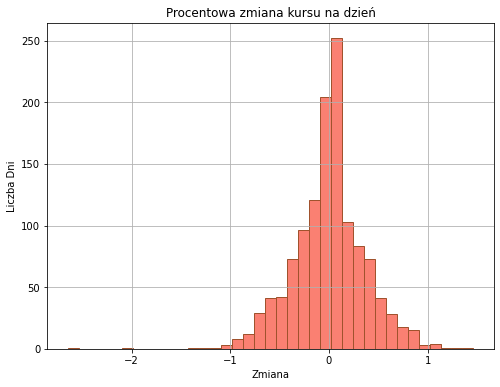

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(daily_df['DailyExchangeRateChangePercent'], bins=number_of_bins, edgecolor='sienna', color = 'salmon')
plt.title('Procentowa zmiana kursu na dzień')
plt.xlabel('Zmiana')
plt.ylabel('Liczba Dni')
plt.grid(True)
plt.show()

### 6. Powtórz punkty 4 i 5 dla wzrostów w ciągu trzech dni. Uwaga: jeśli jeden odczyt zawiera różnicę między otwarciem w poniedziałek, a zamknięciem w środę, to nastepny odczyt ma być różnicą między otwarciem we wtorek, a zamknięciem w czwartek.

Średnia wynosi: -0.00864%
Odchylenie standardowe wynosi: 0.65402%


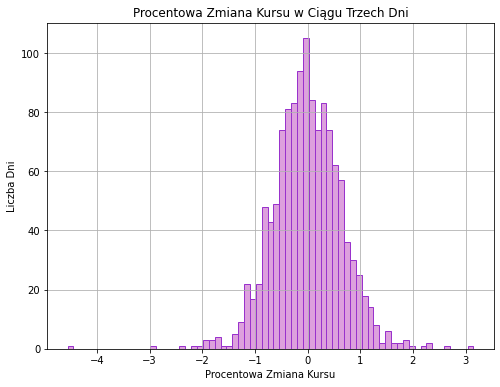

In [63]:
daily_df['ThreeDaysChange'] = ((daily_df['Close'].shift(-2) - daily_df['Open']) / daily_df['Open']) * 100

mean_three = daily_df['ThreeDaysChange'].mean()
std_three = daily_df['ThreeDaysChange'].std()

print(f'Średnia wynosi: {mean_three:.5f}%')
print(f'Odchylenie standardowe wynosi: {std_three:.5f}%')

n = daily_df['ThreeDaysChange'].size
width = 1.0 + np.log2(n)

max_three = daily_df['ThreeDaysChange'].max()
min_three = daily_df['ThreeDaysChange'].min()
number_of_bins = math.ceil((max_three*100 - min_three*100) / width)

plt.figure(figsize=(8, 6))
plt.hist(daily_df['ThreeDaysChange'], bins=number_of_bins , edgecolor='darkorchid', color='plum')
plt.title('Procentowa Zmiana Kursu w Ciągu Trzech Dni')
plt.xlabel('Procentowa Zmiana Kursu')
plt.ylabel('Liczba Dni')
plt.grid(True)
plt.show()